100
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh
chushsh


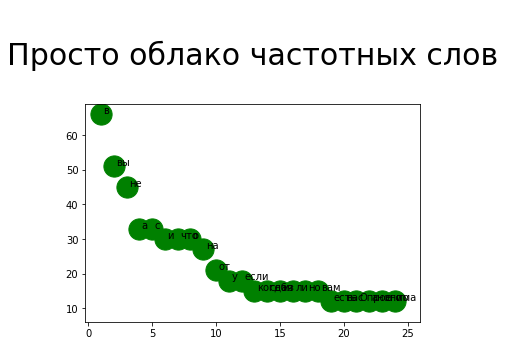

[]


<Figure size 432x288 with 0 Axes>

In [91]:
import urllib.request
import json
import collections
import time
import numpy
import string
import matplotlib
import re
import os
from datetime import datetime
from collections import OrderedDict
from wordcloud import WordCloud

import matplotlib.pyplot as plt

comms = []
text_post = []
data2 = []
pst4 = []
kucha1 = []
kucha2 = []
kucha3 = [i for i in range(1, 25)]


def req_post():
    token = 'c5f759d28fd6096c9371109874cf8c9521c8138004ce1d503a8b0a56b4b76276e39f2e3a47f8dcb93c11e'
    version = '5.92'
    group = '-162753050'
    count = '100'
    i = 0
    while i < 300:
        req = urllib.request.Request(
        'https://api.vk.com/method/wall.get?owner_id=%s&count=%s&v=%s&access_token=%s' % (group, count, version, token)) 
        response = urllib.request.urlopen(req) 
        result = response.read().decode('utf-8')
        data = json.loads(result)
        i += 100
        all_together(data)
        write_down(text_post)
    get_len(text_post)
    get_comms(data)
    final_count(text_post)
    get_len_com(comms)
    
    
def get_comms(data):
    token = 'c5f759d28fd6096c9371109874cf8c9521c8138004ce1d503a8b0a56b4b76276e39f2e3a47f8dcb93c11e'
    version = '5.92'
    group = '-162753050'
    count = '100'
    print(len(data['response']['items']))
    
    for d in [data]: 
        for i in range(len(data['response']['items'])):
            coms = []
            post_id = data['response']['items'][i]['id']
            req1 = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=%s&post_id=%s&count=%s&v=%s&access_token=%s' % 
                (group, post_id, count, version, token))
            response1 = urllib.request.urlopen(req1)
            result1 = response1.read().decode('utf-8')
            data2 = json.loads(result1)
            write_comm(data2)
    
def all_together(data):
    j = 0
    while j < 100:
        text_post.append(data['response']['items'][j]['text'])
        j += 1
    return text_post

def write_down(text_post):
    with open("data.txt", "a", encoding="utf-8") as f:
        for post in text_post:
            f.write(post)
            f.write("\n")
            
def write_comm(data2):
    comms = []
    comms1 = []
    commens1 = [] 
    try:
        for d in [data2]:
            for j in range(len(data2['response']['items'])):
                comms.append(data2['response']['items'][j]['text'])
            with open("data1.txt", "w", encoding="utf-8") as f:
                for com in comms:
                    f.write(com)
                    f.write('\n') 
    except:
        print('chushsh')
    return comms

                    
def get_len(text_post):
    len_word = []
    for post in text_post:
        kucha_raw = post.split()
        len_post = len(kucha_raw)
        len_word.append(len_post)
    
    
def final_count(text_post):
    for pst in text_post:
        pst2 = "".join(c for c in pst if c not in ('!','.',':', '—'))
        pst3 = pst2.split()
        for word in pst3:
            pst4.append(word)
    counts = collections.Counter(pst4).most_common(25)
    graph(counts)

def graph(counts):
    for key, value in counts:
        kucha1.append(key)
        kucha2.append(value)

    for x, y, d in zip(kucha3, kucha2, kucha1):
        plt.scatter(x, y, c = "green", s=450)
        plt.text(x+0.2, y+0.2, d)
    plt.title('\nПросто облако частотных слов\n',  fontsize=15)
    plt.show()
    plt.savefig('please.pdf')

req_post()